## Name : Ashlesha Bhandarkar
## Roll No. D1_03

## Deeo Learning Practical -5

### Aim :- Classify images of clothing
### Import the Brain Tumor MRI Classification dataset.
### Explore the data.
### Preprocess the data.
### Build the CNN model. Set up the layers. Compile the model.
### Train the model. Feed the model. Evaluate accuracy. Make predictions. Verify predictions.
### Suggest 3-4 different configuration of the model.
### Your Target is to achieve more than 95% accuracy of your model, by performing hyperparameter tuning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/brain.zip"

Archive:  /content/drive/MyDrive/brain.zip
   creating: brain/brain_tumor_dataset/
   creating: brain/brain_tumor_dataset/no/
  inflating: brain/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain/brain_tumor_dataset/no/17 no.jpg  
  inflating: brain/brain_tumor_dataset/no/18 no.jpg  
  inflating: brain/brain_tumor_dataset/no/19 no.jpg  
  inflating: brain/brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain/brain_tumor_dataset/no/20 no.jpg  
  inflating: brain/brain_tumor_dataset/no/21 no.jpg  
  inflating: brain/brain_tumor_dataset/no/22 no.jpg  
  inflating: brain/brain_tumor_dataset/no/23 no.jpg  
  inflating: brain/brain_tumor_dataset/no/24 no.jpg  
  inflatin

In [ ]:
X = "/content/brain/brain_tumor_dataset/yes"
y = "/content/brain/brain_tumor_dataset/no"

Populating the interactive namespace from numpy and matplotlib


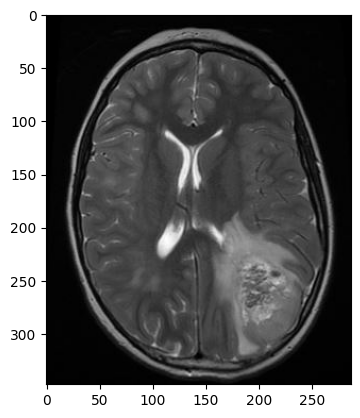

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/brain/brain_tumor_dataset/yes/Y100.JPG')
imgplot = plt.imshow(img)
plt.show()


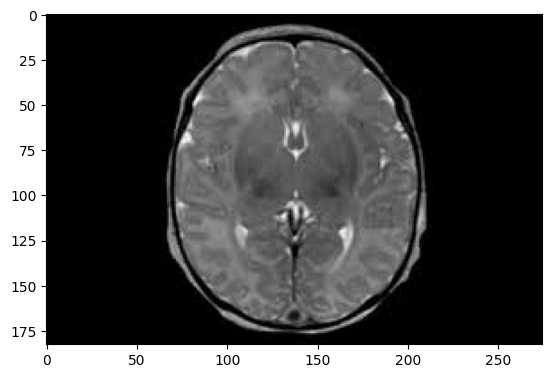

In [ ]:
img=mpimg.imread('/content/brain/brain_tumor_dataset/no/12 no.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(tensorflow.__version__)

2.15.0


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
yes_dir = "/content/brain/brain_tumor_dataset/yes"
no_dir = "/content/brain/brain_tumor_dataset/no"

In [ ]:
desired_width = 100
desired_height = 100

In [ ]:
def load_data(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename))
            # Preprocess the image if necessary (resize, normalize, etc.)
            img = cv2.resize(img, (desired_width, desired_height))  # Example resizing
            images.append(img)
            labels.append(label)
    return images, labels

In [ ]:
yes_images, yes_labels = load_data(yes_dir, 1)

In [ ]:
no_images, no_labels = load_data(no_dir, 0)

In [ ]:
images = np.array(yes_images + no_images)
labels = np.array(yes_labels + no_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
img_width, img_height = 150,150  #width and height of the images
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:

import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/brain/brain_tumor_dataset'  # Directory containing training images
validation_data_dir = '/content/brain/valid'  # Directory containing validation images
batch_size = 32
epochs = 20  # Adjust as needed

# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for validation data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),  # Resize images to 100x100
    batch_size=batch_size,
    class_mode='binary')  # Assuming binary classification (e.g., 'yes' and 'no')

# Generating batches of validation data
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(100, 100),  # Resize images to 100x100
    batch_size=batch_size,
    class_mode='binary')

# Now you can proceed with training your model using the defined generators


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


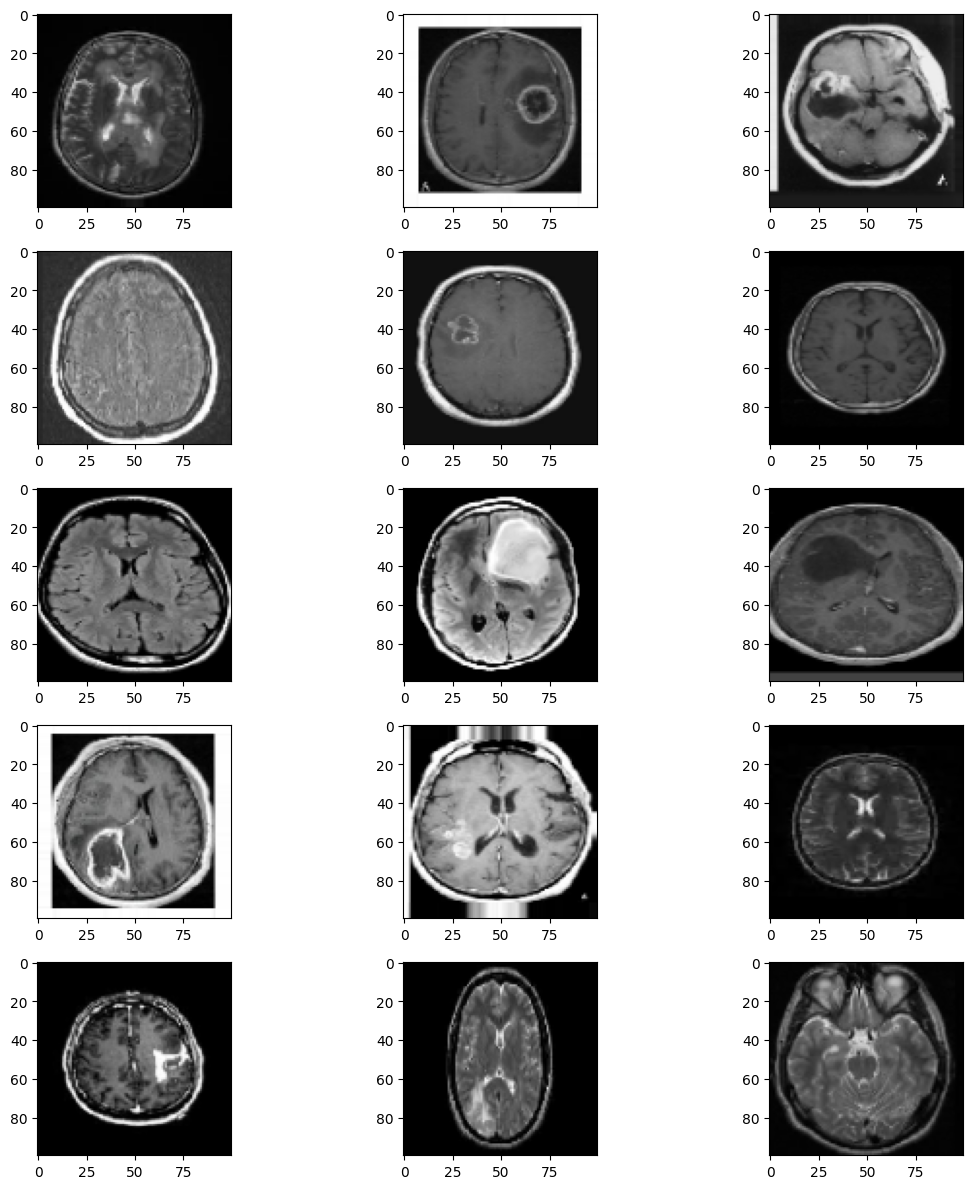

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
img_width, img_height = 150, 150
batch_size = 20

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:

print("Input Data Shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Input Data Shapes:
X_train shape: (138, 100, 100, 3)
X_test shape: (35, 100, 100, 3)


In [ ]:
print("\nLabel Data Shapes:")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Label Data Shapes:
y_train shape: (138,)
y_test shape: (35,)


In [ ]:
from skimage.transform import resize

def preprocess_images(images, target_size):
    processed_images = []
    for img in images:
        resized_img = resize(img, target_size)
        processed_images.append(resized_img)
    return np.array(processed_images)


In [ ]:
X_train_processed = preprocess_images(X_train, (img_width, img_height))
X_test_processed = preprocess_images(X_test, (img_width, img_height))

In [ ]:
print("\nProcessed Input Data Shapes:")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)


Processed Input Data Shapes:
X_train_processed shape: (138, 150, 150, 3)
X_test_processed shape: (35, 150, 150, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))  # Update number of units here

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 10, 128)      

In [ ]:
# Training the model
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_generator),  # Number of batches per epoch (automatically calculated by flow_from_directory)
    epochs=epochs,  # Number of epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=len(validation_generator)  # Number of validation batches per epoch (automatically calculated by flow_from_directory)
)


Epoch 1/20
8/8 [==============================] - 9s 840ms/step - loss: 0.6956 - accuracy: 0.6126 - val_loss: 0.6431 - val_accuracy: 0.6126
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.6142 - accuracy: 0.6364 - val_loss: 0.5034 - val_accuracy: 0.7866
Epoch 3/20
8/8 [==============================] - 8s 952ms/step - loss: 0.6124 - accuracy: 0.7194 - val_loss: 0.5146 - val_accuracy: 0.7787
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.5475 - accuracy: 0.7470 - val_loss: 0.4664 - val_accuracy: 0.7826
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 0.5338 - accuracy: 0.7431 - val_loss: 0.4617 - val_accuracy: 0.7905
Epoch 6/20
8/8 [==============================] - 7s 963ms/step - loss: 0.5338 - accuracy: 0.7273 - val_loss: 0.5046 - val_accuracy: 0.7549
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 0.5289 - accuracy: 0.7352 - val_loss: 0.4589 - val_accuracy: 0.7905
Epoch 8/20
8/8 [================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


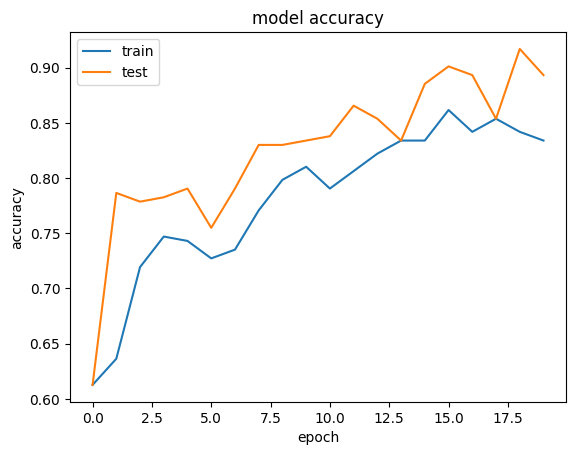

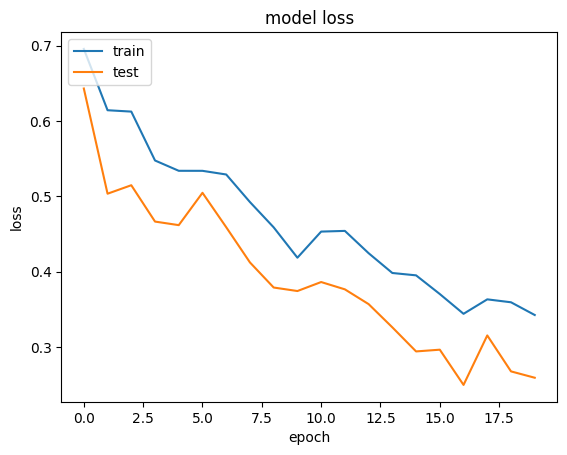

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(history.history.keys())
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

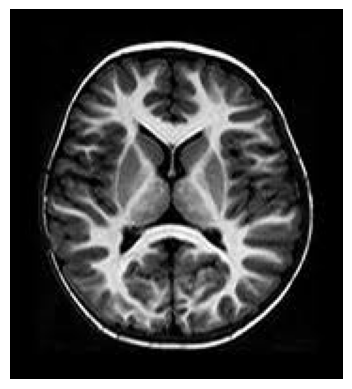

1/1 [==============================] - 0s 194ms/step
Prediction:  no


In [ ]:
img_path = '/content/brain/valid/no/14 no.jpg'
img = mpimg.imread(img_path)

# Display the original image
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the image to match the expected input shape of the model (100x100)
img_resized = image.array_to_img(img)
img_resized = img_resized.resize((100, 100))
img_pred = image.img_to_array(img_resized)
img_pred = np.expand_dims(img_pred, axis=0)  # Add batch dimension

# Make predictions
rslt = model.predict(img_pred)

# Interpret the results
prediction = "yes" if rslt[0][0] == 1 else "no"
print('Prediction: ', prediction)

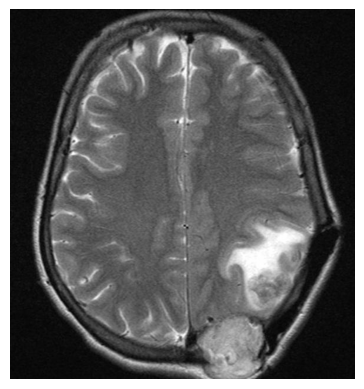

1/1 [==============================] - 0s 25ms/step
Prediction:  yes


In [ ]:
img_path = '/content/brain/valid/yes/Y102.jpg'
img = mpimg.imread(img_path)

# Display the original image
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the image to match the expected input shape of the model (100x100)
img_resized = image.array_to_img(img)
img_resized = img_resized.resize((100, 100))
img_pred = image.img_to_array(img_resized)
img_pred = np.expand_dims(img_pred, axis=0)  # Add batch dimension

# Make predictions
rslt = model.predict(img_pred)

# Interpret the results
prediction = "yes" if rslt[0][0] == 1 else "no"
print('Prediction: ', prediction)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directory paths and other parameters
train_data_dir = '/content/brain/brain_tumor_dataset'  # Directory containing training images
validation_data_dir = '/content/brain/valid'  # Directory containing validation images
batch_size = 32
epochs = 20  # Adjust as needed

# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for validation data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(148, 148),  # Update target size to match your model's input shape
    batch_size=batch_size,
    class_mode='binary')  # Assuming binary classification (e.g., 'yes' and 'no')

# Generating batches of validation data
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(148, 148),  # Update target size to match your model's input shape
    batch_size=batch_size,
    class_mode='binary')

# Now you can proceed with training your model using the defined generators


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [ ]:
input_shape = (148, 148, 3)

# Define the model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 146, 146, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 146, 146, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 71, 71, 64)       

In [ ]:
batch_images, batch_labels = next(train_generator)
print("Shape of batch images:", batch_images.shape)


Shape of batch images: (32, 148, 148, 3)


In [ ]:
# Redefine the ReduceLROnPlateau callback with the correct metric
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Update callbacks list
callbacks = [earlystop, learning_rate_reduction]

# Fit the model using generators
history = model2.fit(train_generator,
                     steps_per_epoch=len(train_generator),
                     epochs=epochs,
                     validation_data=validation_generator,
                     validation_steps=len(validation_generator),
                     callbacks=callbacks)


Epoch 1/20
8/8 [==============================] - 22s 3s/step - loss: 0.3844 - accuracy: 0.8379 - val_loss: 8.3935 - val_accuracy: 0.6126 - lr: 0.0010
Epoch 2/20
8/8 [==============================] - 22s 3s/step - loss: 0.4125 - accuracy: 0.8103 - val_loss: 9.2690 - val_accuracy: 0.6126 - lr: 0.0010
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.3843 - accuracy: 0.8577
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 23s 3s/step - loss: 0.3843 - accuracy: 0.8577 - val_loss: 10.1754 - val_accuracy: 0.6126 - lr: 0.0010
Epoch 4/20
8/8 [==============================] - 27s 4s/step - loss: 0.3898 - accuracy: 0.8379 - val_loss: 11.8913 - val_accuracy: 0.6126 - lr: 5.0000e-04
Epoch 5/20
8/8 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8458
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
8/8 [==============================] - 28s 4s/step - loss: 0.2945

In [ ]:
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Define optimizer with lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model2.compile(optimizer=optimizer,
               loss='binary_crossentropy',
               metrics=['accuracy'])




In [ ]:
# Fit the model
history = model2.fit(train_generator,
                     steps_per_epoch=len(train_generator),
                     epochs=epochs,
                     validation_data=validation_generator,
                     validation_steps=len(validation_generator),
                     callbacks=callbacks)

Epoch 1/20
8/8 [==============================] - 47s 6s/step - loss: 0.6587 - accuracy: 0.6324 - val_loss: 0.5470 - val_accuracy: 0.7708 - lr: 1.0000e-04
Epoch 2/20
8/8 [==============================] - 45s 6s/step - loss: 0.5869 - accuracy: 0.7075 - val_loss: 0.4937 - val_accuracy: 0.8024 - lr: 1.0000e-04
Epoch 3/20
8/8 [==============================] - 44s 6s/step - loss: 0.5462 - accuracy: 0.7194 - val_loss: 0.4690 - val_accuracy: 0.8103 - lr: 1.0000e-04
Epoch 4/20
8/8 [==============================] - 50s 6s/step - loss: 0.5612 - accuracy: 0.7233 - val_loss: 0.4658 - val_accuracy: 0.8063 - lr: 1.0000e-04
Epoch 5/20
8/8 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.7391
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
8/8 [==============================] - 43s 6s/step - loss: 0.5341 - accuracy: 0.7391 - val_loss: 0.4533 - val_accuracy: 0.8103 - lr: 1.0000e-04
Epoch 6/20
8/8 [==============================] - 44s 6s/step - loss

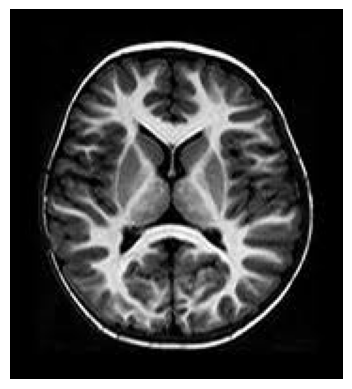

1/1 [==============================] - 0s 188ms/step
Prediction:  no


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np

img_path = '/content/brain/valid/no/14 no.jpg'
img = mpimg.imread(img_path)

# Display the original image
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the image to match the expected input shape of the model (148x148)
img_resized = image.array_to_img(img)
img_resized = img_resized.resize((148, 148))  # Resize to (148, 148)
img_pred = image.img_to_array(img_resized)
img_pred = np.expand_dims(img_pred, axis=0)  # Add batch dimension

# Make predictions
rslt = model2.predict(img_pred)

# Interpret the results
prediction = "yes" if rslt[0][0] == 1 else "no"
print('Prediction: ', prediction)


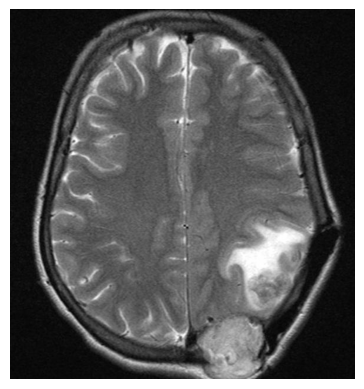

1/1 [==============================] - 0s 63ms/step
Prediction:  yes


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np

img_path = '/content/brain/valid/yes/Y102.jpg'
img = mpimg.imread(img_path)

# Display the original image
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the image to match the expected input shape of the model (148x148)
img_resized = image.array_to_img(img)
img_resized = img_resized.resize((148, 148))  # Resize to (148, 148)
img_pred = image.img_to_array(img_resized)
img_pred = np.expand_dims(img_pred, axis=0)  # Add batch dimension

# Make predictions
rslt = model2.predict(img_pred)

# Interpret the results
prediction = "yes" if rslt[0][0] == 1 else "no"
print('Prediction: ', prediction)
